In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("individual_book_train/stock_1.csv")
df.shape

(1507532, 11)

## Realised Volatility

In [3]:
df.head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id
0,5,0,1.000754,1.001542,1.000689,1.001607,1,25,25,100,1
1,5,1,1.000754,1.001673,1.000689,1.001739,26,60,25,100,1
2,5,2,1.000754,1.001411,1.000623,1.001476,1,25,25,125,1
3,5,3,1.000754,1.001542,1.000689,1.001607,125,25,126,36,1
4,5,4,1.000754,1.001476,1.000623,1.001542,100,100,25,25,1


### Compute BidAskPrice and WAP for stock 1 and add to df

In [4]:
df["wap"] = (df["bid_price1"] * df["ask_size1"] + df["ask_price1"] * df["bid_size1"]) / (df["bid_size1"] + df["ask_size1"])
df["bidaskspread"] = df["ask_price1"] / df["bid_price1"] - 1
df.head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id,wap,bidaskspread
0,5,0,1.000754,1.001542,1.000689,1.001607,1,25,25,100,1,1.000785,0.000787
1,5,1,1.000754,1.001673,1.000689,1.001739,26,60,25,100,1,1.001032,0.000918
2,5,2,1.000754,1.001411,1.000623,1.001476,1,25,25,125,1,1.000780,0.000656
3,5,3,1.000754,1.001542,1.000689,1.001607,125,25,126,36,1,1.001411,0.000787
4,5,4,1.000754,1.001476,1.000623,1.001542,100,100,25,25,1,1.001115,0.000721


### Compute Log Return when time_id == 5 and seconds_in_bucket == 16

In [5]:
wap1 = df.loc[(df['time_id'] == 5) & (df['seconds_in_bucket'] == 16), 'wap'].values
wap2 = df.loc[(df['time_id'] == 5) & (df['seconds_in_bucket'] == 15), 'wap'].values

log_r = np.log(wap1 / wap2)
print(log_r)

[-0.00030736]


### Compute Volatility and Visualisation

In [6]:
log_r1 = [] # list to store log returns
time_ids = df["time_id"].unique()[0:500] # obtaining first 500 time_ids for stock 1

for i in range(len(time_ids)):
    sec = df.loc[df["time_id"] == time_ids[i], "seconds_in_bucket"]
    price = df.loc[df["time_id"] == time_ids[i], "wap"]
    log_r = np.log(price[1:].values / price[:-1].values)
    log_r1.append(pd.DataFrame({'time': sec[1:], 'log_return': log_r}))
    time_no_change = np.setdiff1d(np.arange(1, 601), log_r1[i]['time'])
    if len(time_no_change) > 0:
        new_df = pd.DataFrame({'time': time_no_change, 'log_return': 0})
        log_r1[i] = pd.concat([log_r1[i], new_df]).sort_values(by='time')
    
    #log_r1[i] = log_r1[i].set_index(['time'])

pd.set_option("display.precision", 10)
pd.options.display.max_rows = 650
log_r1[0]

,time,log_return
1,1,0.0002472071
2,2,-0.0002522531
3,3,0.0006302418
4,4,-0.0002948942
5,5,0.0002686842
6,6,-0.0002431574
7,7,-0.0002497938
8,8,-0.0000023023
9,9,0.0000003608
10,10,0.0000019415


In [7]:
vol = []
comp_vol = lambda x: np.sqrt(np.sum(np.power(x, 2)))

for i in range(len(log_r1)):
    log_r1[i]['time_bucket'] = np.ceil(log_r1[i]['time'] / 30)
    vol.append(log_r1[i].groupby('time_bucket').agg({'log_return': comp_vol}).reset_index())
    vol[i].columns = ['time_bucket', 'volatility']
    
vol[0]

,time_bucket,volatility
0,1.0,0.0017032854
1,2.0,0.0008526514
2,3.0,0.0018137931
3,4.0,0.0009780317
4,5.0,0.0018896206
5,6.0,0.0011240192
6,7.0,0.0013219932
7,8.0,0.0016714197
8,9.0,0.0017963333
9,10.0,0.0014122140


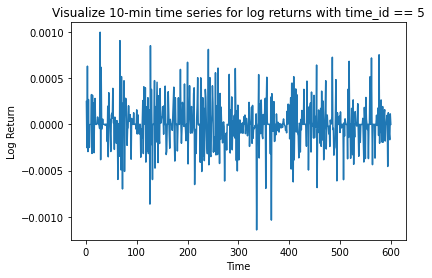

In [8]:
plt.plot(log_r1[0]["time"], log_r1[0]["log_return"])
plt.title("Visualize 10-min time series for log returns with time_id == 5")
plt.xlabel("Time")
plt.ylabel("Log Return")
plt.show()

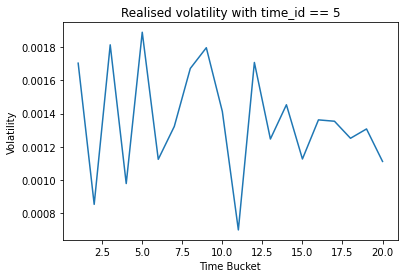

In [9]:
plt.plot(vol[0]["time_bucket"], vol[0]["volatility"])
plt.title("Realised volatility with time_id == 5")
plt.xlabel("Time Bucket")
plt.ylabel("Volatility")
plt.show()

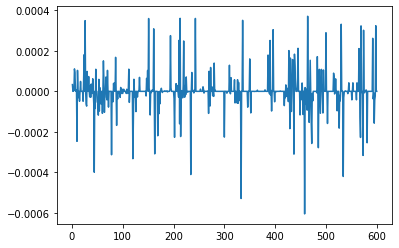

In [10]:
plt.plot(log_r1[1]['time'], log_r1[1]['log_return'])

## Estimation and Prediction

In [11]:
# Should not be necessary:

# First dropping all NAs for below plot
#lr = log_r1[0]
#lr = lr.dropna()

#all(vol[0].isna()), all(lr.isna())

### Autocorrelation ACF

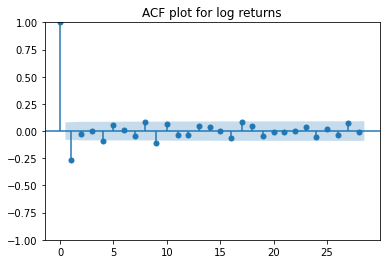

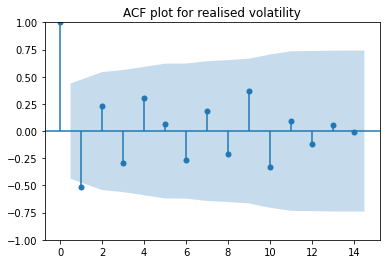

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
# note difference in assumptions for calculating variance:
# https://stackoverflow.com/questions/40578701/acf-confidence-intervals-in-r-vs-python-why-are-they-different 
# python uses Bartlett's formula

# this affects the confidence interval lines hence looks slightly different from lab4 graphs

plot_acf(log_r1[0]['log_return'], title="ACF plot for log returns");
plot_acf(vol[0]["volatility"], title="ACF plot for realised volatility");

### Regression Analysis

In [13]:
# using data from first 8min of each 10min bucket as training data
# remaining 2min is used as validation data

vol_train, vol_val = [], []

for i in range(len(log_r1)): # 0 to 499
    vol_train.append(vol[i].iloc[0:16])
    vol_val.append(vol[i].iloc[16:])

print(f" Dims(train data): {vol_train[0].shape}\n", f"Dims(valid data): {vol_val[0].shape}\n")
print(f"Example from log_r1[0]:\n\n Train data:\n{vol_train[0]}", f"\n Valid data:\n{vol_val[0]}", sep = "\n")

 Dims(train data): (16, 2)
 Dims(valid data): (4, 2)

Example from log_r1[0]:

 Train data:
    time_bucket    volatility
0           1.0  0.0017032854
1           2.0  0.0008526514
2           3.0  0.0018137931
3           4.0  0.0009780317
4           5.0  0.0018896206
5           6.0  0.0011240192
6           7.0  0.0013219932
7           8.0  0.0016714197
8           9.0  0.0017963333
9          10.0  0.0014122140
10         11.0  0.0006986438
11         12.0  0.0017075098
12         13.0  0.0012462949
13         14.0  0.0014527977
14         15.0  0.0011259711
15         16.0  0.0013616329

 Valid data:
    time_bucket    volatility
16         17.0  0.0013534371
17         18.0  0.0012507492
18         19.0  0.0013069810
19         20.0  0.0011112819


Recall: we study first 500 time_id for stock1 and each time_id corresponds to a specific 10min bucket.
Create a list of length 500 where each element is a dataframe for a different time_id. All dataframes have four columns:
1. Realised volatility in the train data
2. Corresponding mean prices
3. Mean number of orders
4. Mean BidAskSpread in the previous period

In [14]:
df["time_bucket"] = np.ceil(df["seconds_in_bucket"] / 30)
df["time_bucket"]

0           0.0
1           1.0
2           1.0
3           1.0
4           1.0
           ... 
1507527    20.0
1507528    20.0
1507529    20.0
1507530    20.0
1507531    20.0
Name: time_bucket, Length: 1507532, dtype: float64

In [15]:
df["num_order"] = df["bid_size1"] + df["ask_size1"] + df["bid_size2"] + df["ask_size2"]
df["num_order"].head()

0    151
1    211
2    176
3    312
4    250
Name: num_order, dtype: int64

In [16]:
len_train = len(vol_train[0]["volatility"]) # 16 
list_reg = [] # list for regression

for i in range(len(vol)): # 500
    stats_bucket = df.loc[
        (df["time_id"] == time_ids[i]) & (df["time_bucket"] != 0), ["bidaskspread","wap","num_order","time_bucket"]
    ]
    # for each 30sec bucket, compute statistics:
    mean_price = stats_bucket.groupby("time_bucket")["wap"].mean().reset_index()
    mean_order = stats_bucket.groupby("time_bucket")["num_order"].mean().reset_index()
    mean_bas = stats_bucket.groupby("time_bucket")["bidaskspread"].mean().reset_index()
        
    list_reg.append(pd.DataFrame({
        "volatility": vol_train[i]["volatility"][1:len_train].reset_index(drop=True),  # had to fix shuffled index
        "price": mean_price["wap"][:len_train-1].reset_index(drop=True),
        "order": mean_order["num_order"][:len_train-1].reset_index(drop=True),
        "bidaskspread": mean_bas["bidaskspread"][:len_train-1].reset_index(drop=True)
    }))
    
list_reg[141]

,volatility,price,order,bidaskspread
0,0.0001955853,0.9999951582,188.7500000000,0.0002921747
1,0.0003842005,1.0000455915,171.4545454545,0.0003386755
2,0.0000794512,0.9997177054,389.7142857143,0.0003183397
3,0.0001264619,0.9994392483,315.7647058824,0.0004385022
4,0.0004972580,0.9995190444,553.2500000000,0.0004385022
5,0.0006221616,0.9993523001,438.0769230769,0.0004835343
6,0.0005250722,0.9988346444,505.3000000000,0.0005191797
7,0.0005674737,0.9984308685,527.5384615385,0.0004839609
8,0.0002729443,0.9991766316,408.3636363636,0.0006115718
9,0.0005906754,0.9993043848,248.2857142857,0.0004177361


In [17]:
np.asarray([i.isnull() for i in list_reg]).any()

False

### Use weighted least squares to fit model when time_id==5
Assume, at 8min of a 10min bucket and we weight observations by *recency* with weight $0.8^{8-t}$ (time unit: min). 
Use a list with length 500 to store all models, where each element of the list is a linear regression model of one of the 500 time_id.

In [18]:
import statsmodels.api as sm

lm_models = []

for i in range(len(vol)):
    lm_models.append(sm.WLS(list_reg[i]["volatility"], 
                            list_reg[i][["price", "order", "bidaskspread"]], 
                            weights = 0.8 ** ((np.arange(len_train-2,-1,-1)) / 2)).fit())

# for some periods, linear regression performs well
print(lm_models[161].summary())

                                 WLS Regression Results                                
Dep. Variable:             volatility   R-squared (uncentered):                   0.834
Model:                            WLS   Adj. R-squared (uncentered):              0.793
Method:                 Least Squares   F-statistic:                              20.12
Date:                Sat, 08 Apr 2023   Prob (F-statistic):                    5.64e-05
Time:                        04:22:48   Log-Likelihood:                          102.98
No. Observations:                  15   AIC:                                     -200.0
Df Residuals:                      12   BIC:                                     -197.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

C:\Users\imgap\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## HAV-RV model

Create a list length 500, where each element of the list is a data frame for a different time_id. 
All the data frames have three columns: the realised volatility and the corresponding realised volatility in the previous period and the mean realised volatility during the previous five periods. (The first row starts from the 6th time points for each 10-min time bucket because we need the mean realised volatility in the past 5 periods.)

In [19]:
list_HAV = []

for i in range(len(vol)):
    mean_vol = np.zeros(len_train - 5)
    
    for j in range(5):
        mean_vol += np.asarray(vol_train[i]['volatility'][j:j+len_train-5] / 5)
        
    volt = vol_train[i]['volatility']
    
    list_HAV.append(pd.DataFrame({
        'vol': np.asarray(volt[5:(len_train)]),
        'vol_1': np.asarray(volt[4:(len_train-1)]),
        'mean_vol_5': np.asarray(mean_vol)
    }))

In [20]:
list_HAV[15]

,vol,vol_1,mean_vol_5
0,0.0003609979,0.0002048768,0.0006412550
1,0.0004381688,0.0003609979,0.0004897833
2,0.0005159281,0.0004381688,0.0004500996
3,0.0007688024,0.0005159281,0.0004470640
4,0.0006294656,0.0007688024,0.0004577548
5,0.0004536697,0.0006294656,0.0005426726
6,0.0003771543,0.0004536697,0.0005612069
7,0.0006642951,0.0003771543,0.0005490040
8,0.0006296298,0.0006642951,0.0005786774
9,0.0005110918,0.0006296298,0.0005508429


### Fit HAV model

In [21]:
quar = []

def comp_quar(x):
    return len(x) / 3 * np.sum(x ** 4)

for i in range(len(log_r1)):
    log_r1_i = log_r1[i]
    quar_i = log_r1_i.groupby('time_bucket')['log_return'].agg(comp_quar).reset_index()
    quar_i.columns = ['time_bucket', 'quarticity']
    quar.append(quar_i)

quar[0]

,time_bucket,quarticity
0,1.0,1.3925049942e-11
1,2.0,7.0181438237e-13
2,3.0,1.3451560185e-11
3,4.0,1.1434916892e-12
4,5.0,1.4702915220e-11
5,6.0,1.4124012352e-12
6,7.0,4.4830001126e-12
7,8.0,5.7530449145e-12
8,9.0,9.2915719016e-12
9,10.0,4.8328796591e-12


In [22]:
HAV_ols = []
HAV_wls = []

for i in range(len(vol)):
    HAV_ols.append(sm.OLS(list_HAV[i]['vol'], 
                          sm.add_constant(pd.concat([list_HAV[i]['vol_1'], 
                                                list_HAV[i]['mean_vol_5']], axis=1))).fit())
    
    # NOTE: we have to add a small regularization constant to the division term to prevent zerodivision
    # Solver in R is more robust to zerodivision -- in Python we end up with SVD did not converge error
    weights_i = list_HAV[i]['vol_1'] / (np.sqrt(quar[i]['quarticity'][4:(len_train - 1)].values) + 1e-8)

    HAV_wls.append(sm.WLS(list_HAV[i]['vol'], 
                          sm.add_constant(pd.concat([list_HAV[i]['vol_1'], 
                                                list_HAV[i]['mean_vol_5']], axis=1)), 
                                                weights=weights_i).fit())
    
print(HAV_wls[217].summary())

                            WLS Regression Results                            
Dep. Variable:                    vol   R-squared:                       0.854
Model:                            WLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     23.45
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           0.000451
Time:                        04:22:52   Log-Likelihood:                 88.109
No. Observations:                  11   AIC:                            -170.2
Df Residuals:                       8   BIC:                            -169.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.000      5.764      0.0

C:\Users\imgap\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Assessing the Model


### Using the fitted Linear Regression models to predict the realised volatility on valid data

In [31]:
pred_lm = []
list_reg_val = [] # list for regression

for i in range(len(vol)): # 500
    len_val = len(vol_val[i]["volatility"]) # 16 

    stats_bucket = df.loc[
        (df["time_id"] == time_ids[i]) & (df["time_bucket"] != 0), ["bidaskspread","wap","num_order","time_bucket"]
    ]
    # for each 30sec bucket, compute statistics:
    mean_price = stats_bucket.groupby("time_bucket")["wap"].mean().reset_index()
    mean_order = stats_bucket.groupby("time_bucket")["num_order"].mean().reset_index()
    mean_bas = stats_bucket.groupby("time_bucket")["bidaskspread"].mean().reset_index()
    
    volt = vol_val[i]["volatility"]
    price = mean_price["wap"][len_train-1:len_train + len_val-1].values
    order = mean_order["num_order"][len_train-1:len_train+len_val-1].values
    bas = mean_bas["bidaskspread"][len_train-1:len_train+len_val-1].values
        
    list_reg_val.append(pd.DataFrame({
        "volatility": volt,
        "price": price,
        "order": order,
        "bidaskspread": bas
    }))
    
    pred_lm.append(lm_models[i].predict(list_reg_val[i][["price","order","bidaskspread"]]))

In [32]:
f"There are {len([b for b in [m.shape == (4,) for m in pred_lm] if b == False])} cases where model fails to predict"

'There are 0 cases where model fails to predict'

In [33]:
np.asarray([m.shape == (4,) for m in pred_lm]).all()

True

In [34]:
import numpy as np
import seaborn as sns

MSE_lm = []
QLIKE_lm = []

for i in range(len(vol)):
    v = vol_val[i]['volatility'].values
    p = pred_lm[i].values
    MSE_lm.append(np.mean(v - p)**2)
    QLIKE_lm.append(np.mean(v / p - np.log(v / p) - 1))

C:\Users\imgap\AppData\Local\Temp/ipykernel_20224/1444973151.py:11: RuntimeWarning: invalid value encountered in log
  QLIKE_lm.append(np.mean(v / p - np.log(v / p) - 1))
C:\Users\imgap\AppData\Local\Temp/ipykernel_20224/1444973151.py:11: RuntimeWarning: divide by zero encountered in log
  QLIKE_lm.append(np.mean(v / p - np.log(v / p) - 1))


<AxesSubplot:>

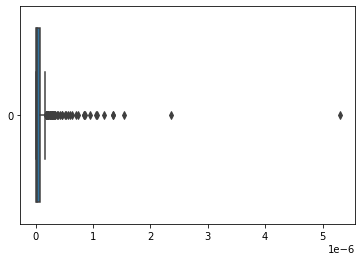

In [35]:
sns.boxplot(data=MSE_lm, orient="h")

<AxesSubplot:>

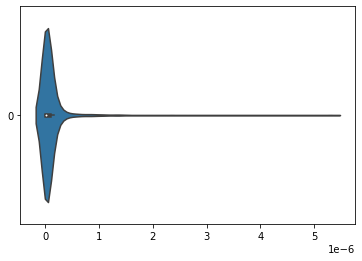

In [36]:
sns.violinplot(data=MSE_lm, orient="h")

<AxesSubplot:>

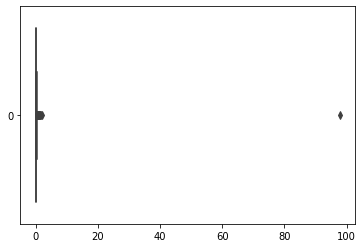

In [37]:
sns.boxplot(data=QLIKE_lm, orient="h")

## ARMA-GARCH models


In [71]:
import pmdarima as pm
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

# inspired by https://goldinlocks.github.io/ARCH_GARCH-Volatility-Forecasting/ 
model_results = []
for i in range(len(vol)):

    model = pm.auto_arima(log_r1[i].loc[log_r1[i].time <= 480, "log_return"],
        d=0, # non-seasonal difference order
        start_p=1, # initial guess for p
        start_q=1, # initial guess for q
        max_p=4, # max value of p to test
        max_q=4, # max value of q to test                        

        seasonal=False, # is the time series seasonal

        information_criterion='bic', # used to select best model
        trace=False, # print results whilst training
        error_action='ignore', # ignore orders that don't work
        stepwise=True, # apply intelligent order search
    )
    
    # Fit best model
    arma_model = sm.tsa.SARIMAX(endog=log_r1[i].loc[log_r1[i].time <= 480, "log_return"],order=model.order)
    model_results.append(arma_model.fit())

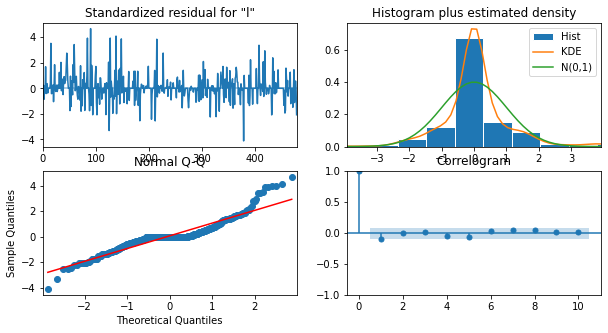

In [72]:
model_results[9].plot_diagnostics(figsize=(10, 5))
plt.show()

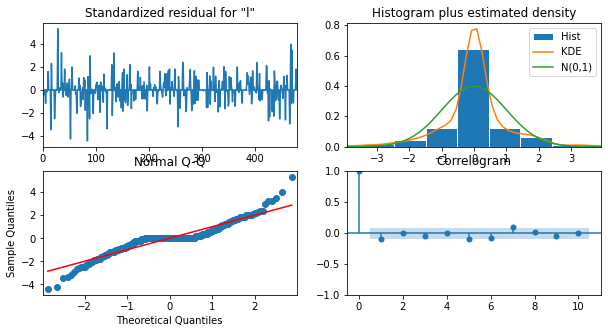

In [73]:
model_results[120].plot_diagnostics(figsize=(10, 5))
plt.show()

In [85]:
# Fit GARCH model with ARMA model residuals
garch_results = []
for i in range(len(vol)):
    garch_model = arch_model(100 * np.asarray(model_results[i].resid), mean='Zero', p=1, q=1, power=0.5)
    garch_results.append(garch_model.fit(disp = 'off'))

In [89]:
# Plot GARCH model fitted results
garch_results[11].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Zero Mean - Power GARCH (power: 0.5) Model Results                 
====================================================================================
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.002
Vol Model:         Power GARCH (power: 0.5)   Log-Likelihood:                648.337
Distribution:                        Normal   AIC:                          -1290.67
Method:                  Maximum Likelihood   BIC:                          -1278.15
                                              No. Observations:                  480
Date:                      Sat, Apr 08 2023   Df Residuals:                      480
Time:                              20:37:03   Df Model:                            0
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2457      0.352      0.697      0.486    [ -0.445,  0.936]
alpha[1]       0.0275  5.849e-02      0.470      0.639 [-8.717e-02,  0.142]
beta[1]        0.0000      1.381      0.000      1.000    [ -2.707,  2.707]
===========================================================================

Covariance estimator: robust
"""

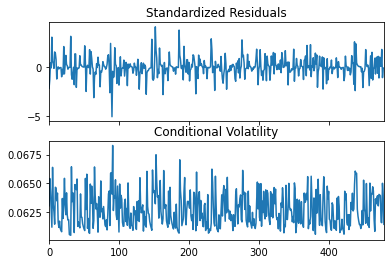

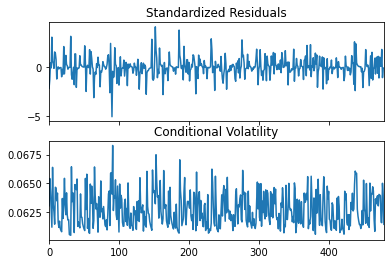

In [88]:
garch_results[11].plot()